# Image exclusion

In [ ]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import os
import csv

dataset_root = 'C:/DATASETS/AGE-FER'
dataset_labels_path = os.path.join(dataset_root, 'labels2 - fixes.csv')
dataset_imgs_path = os.path.join(dataset_root, 'images')

global_labels = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral', 'contempt', 'pleased', 'curiosity', 'uncertainty', 'excitement', 'frustration']
csv_columns = ['dataset','user_id','name','class','age','gender','race','perspective', 'age_group', 'subset', 'auto_age', 'auto_gender', 'age_group_clean', 'gaze']

dtypes = {
    'dataset': 'category',
    'user_id': 'category',
    'name': str,
    'class': 'category',
    'age': 'Int8',
    'gender':'category' ,
    'race': 'category',
    'perspective': 'str',
    'age_group': 'category',
    'subset': 'category',
    'auto_age': bool,
    'auto_gender': bool,
    'auto_perspective': bool,
    'age_group_clean': 'category',
    'gaze': 'category'}

df = pd.read_csv(dataset_labels_path, dtype=dtypes, sep=',', quotechar='"')
df['auto_age'] = df['auto_age'].astype(int)
df['auto_gender'] = df['auto_gender'].astype(int)
df['auto_perspective'] = df['auto_perspective'].astype(int)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)
df

INFO:albumentations.check_version:A new version of Albumentations is available: 2.0.5 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


,dataset,user_id,name,class,age,gender,race,perspective,age_group,subset,auto_age,auto_gender,auto_perspective,age_group_clean,gaze
0,AffectNet,NaN,1000_024C4FA4EE40ACCA92B748EB547A2A9ABAA787193...,neutral,9,male,NaN,front,NaN,NaN,1,1,1,child,front
1,AffectNet,NaN,1000_0314C93B80BB624610FF584BC99EF6D640E3CA3F1...,neutral,59,male,NaN,front,NaN,NaN,1,1,1,middle-age,front
2,AffectNet,NaN,1000_03AB3469617BA5C42419ECBD2000C5DB39B9E6F8E...,neutral,22,male,NaN,front,NaN,NaN,1,1,1,middle-age,front
3,AffectNet,NaN,1000_1CA1FD221BD2ED97309BF3EE678B29597448E3957...,neutral,46,male,NaN,front,NaN,NaN,1,1,1,middle-age,front
4,AffectNet,NaN,1000_1E616F740F35ACA730198610B5E86225EF52C8D2A...,neutral,49,male,NaN,front,NaN,NaN,1,1,1,middle-age,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465930,WSEFEP,WSEFEP-30,SS_0084.jpg,disgust,22,female,polish,front,20-30,NaN,1,0,0,middle-age,front
465931,WSEFEP,WSEFEP-30,SS_0151.jpg,neutral,22,female,polish,front,20-30,NaN,1,0,0,middle-age,front
465932,WSEFEP,WSEFEP-30,SS_0302.jpg,anger,22,female,polish,front,20-30,NaN,1,0,0,middle-age,front
465933,WSEFEP,WSEFEP-30,SS_0539.jpg,sadness,22,female,polish,front,20-30,NaN,1,0,0,middle-age,front


In [18]:
def plot_datasets(df, excluded_datasets, df_count): 
    
    # Set a distinct color palette
    colors = sns.color_palette("rocket", len(df['dataset'].unique()))

    # Set default font size and background color for the plot
    plt.rcParams.update({'font.size': 12, 'axes.facecolor': 'white', 'figure.facecolor': 'white'})

    # Group by 'class' and 'dataset' and count the occurrences
    grouped_df = df_count
    grouped_df = grouped_df.drop(excluded_datasets, axis='columns')

    # Plot a stacked bar plot for 'class' using DataFrame's plot.bar
    plt.figure(figsize=(12, 8))
    grouped_df.plot.bar(stacked=True, color=colors)
    plt.title('Distribution of Class by Dataset', fontsize=20)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    # Move the legend to the right of the plot
    plt.legend(title='Dataset', bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

# Count the number of samples per class and dataset
def count_samples_class_dataset(df, labels):
    
    # First build dict with dataset as key
    dict = {}

    # Iterate over datasets
    for dataset in df['dataset'].unique():
        
        dict[dataset] = {}

        # Iterate over classes
        for class_name in labels:

            dict[dataset][class_name] = df[(df['dataset'] == dataset) & (df['class'] == class_name)].shape[0]
    
    return dict

## Expression exclusion: balance most extensive datasets

Exclude labels different from: ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral'], Ekman's six basic expressions plus 'neutral'

In [19]:
main_labels = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']

# Count number of images with label different from main_labels
df_sample = df.loc[df['class'].isin(main_labels)]
print("Number of images with different label (removed):", df['class'].loc[~df['class'].isin(main_labels)].value_counts().sum())

Number of images with different label (removed): 11977


In [20]:
df_count = pd.DataFrame(count_samples_class_dataset(df, main_labels))
df_count

,AffectNet,BioVidEmo,BU-4DFE,CK+,DDCF,DEFSS,ElderReact,EMOREACT,ExpW,FACES,FEGA,FER2013,Google-FE-Test,JAFFE,KDEF,LIFESPAN,LIRIS,MMI,NHFI,NIMH-ChEFS,RAF-DB,RaFD,SFEW,WSEFEP
anger,21352,430,231,26,793,65,1750,0,3671,342,298,4953,30,30,700,59,4,76,890,104,867,1005,255,31
disgust,3608,430,246,12,804,0,1390,685,3995,342,256,547,30,29,693,7,40,78,439,0,877,1005,89,30
fear,5523,430,255,28,794,71,760,250,1088,342,141,5121,30,32,699,0,174,64,570,106,355,1005,145,30
happiness,123565,430,227,10,800,112,3710,3020,30537,342,327,8989,30,31,699,258,279,100,1406,108,5957,1005,271,30
sadness,21441,425,231,28,796,54,1205,0,10559,342,175,6077,30,31,700,64,116,72,746,104,2460,1005,245,30
surprise,12997,0,239,122,792,0,2830,1490,7060,0,176,4002,30,30,699,78,262,98,775,0,1619,1005,153,30
neutral,68690,0,27,130,790,102,0,0,34883,342,295,6198,30,30,697,888,221,252,524,111,3204,1005,236,30


<Figure size 1200x800 with 0 Axes>

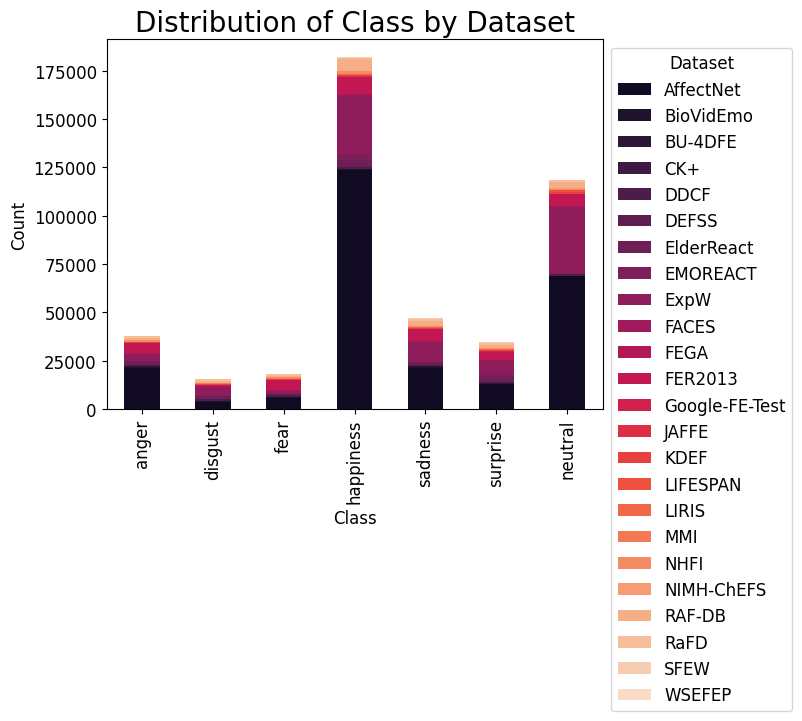

In [21]:
plot_datasets(df, [], df_count)

### Save CSV

In [22]:
dataset_labels_path_out = os.path.join(dataset_root, 'labels3 - balanced.csv')

# Save dataframe in CSV file
df_sample.to_csv(dataset_labels_path_out, index=False)

## Perspective exclusion

Perspectives excluded: 
* 'full_right', 'full_left'
* 'back'
* blank perspective

Not excluded:
* 'Non-frontal' is not removed because all of them come from SFEW and they are 'half-right' or 'half_left' maximum.
* 'frontal'
* 'half_right' and 'half_left'

#### Plot

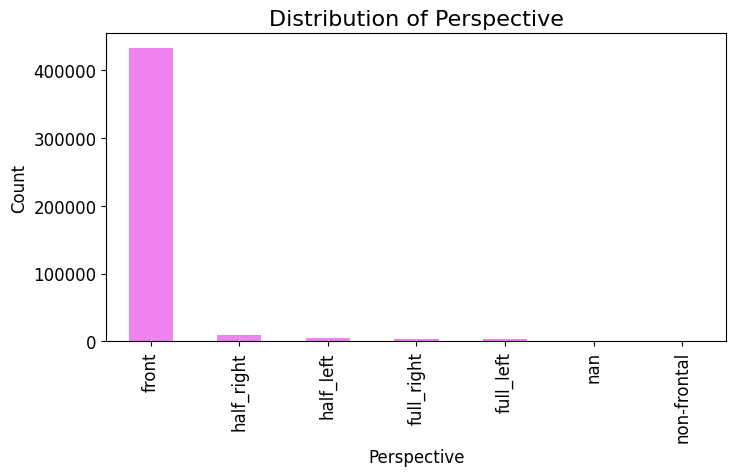

perspective
front          431921
half_right      10017
half_left        4480
full_right       3838
full_left        3569
NaN               132
non-frontal         1
Name: count, dtype: int64


In [23]:
df_rm_datasets = df_sample

# Plot a bar chart for 'perspective'
plt.figure(figsize=(8, 4))
df_rm_datasets['perspective'].value_counts(dropna=False).plot.bar(color=['violet'])
plt.title('Distribution of Perspective', fontsize=16)
plt.xlabel('Perspective')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
print(df_rm_datasets['perspective'].value_counts(dropna=False))

### Remove full_right and full_left

In [24]:
df_rm_perspective = pd.read_csv(os.path.join(dataset_root, 'labels3 - balanced.csv'), dtype=dtypes, sep=',', quotechar='"')
df_rm_perspective['auto_age'] = df['auto_age'].astype(int)
df_rm_perspective['auto_gender'] = df['auto_gender'].astype(int)
df_rm_perspective['auto_perspective'] = df['auto_perspective'].astype(int)

Perspective == 'no_face' not removed because is due to detection error. Removed in later steps.

In [25]:
df_rm_perspective2 = df_rm_perspective.copy()

# Remove all rows where perspective is 'full_right', 'full_left', 'non-frontal', or nan
df_rm_perspective2 = df_rm_perspective2[~df_rm_perspective2['perspective'].isin(['full_right', 'full_left', 'non-frontal'])]
df_rm_perspective2 = df_rm_perspective2.dropna(subset=['perspective'])

#### Plot

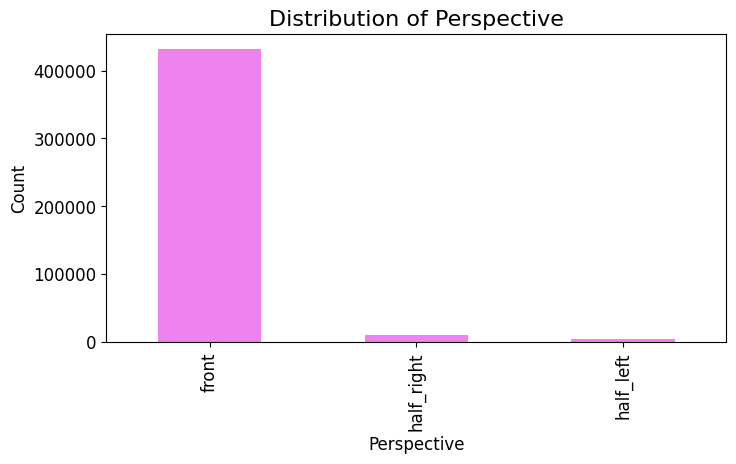

perspective
front         431921
half_right     10017
half_left       4480
Name: count, dtype: int64


In [26]:
# Plot a bar chart for 'perspective'
plt.figure(figsize=(8, 4))
df_rm_perspective2['perspective'].value_counts(dropna=False).plot.bar(color=['violet'])
plt.title('Distribution of Perspective', fontsize=16)
plt.xlabel('Perspective')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
print(df_rm_perspective2['perspective'].value_counts(dropna=False))

#### Save CSV

In [27]:
dataset_labels_path_out = os.path.join(dataset_root, 'labels4 - excluded perspectives.csv')

# Save dataframe in CSV file
df_rm_perspective2.to_csv(dataset_labels_path_out, index=False)

## No age group exclusion

Removed all images with null in age_group_clean, meaning that there is not manual label of the age or the age group, and the automatic age estimation failed.

In [ ]:
df_rm_age = pd.read_csv(os.path.join(dataset_root, 'labels4 - excluded perspectives.csv'), dtype=dtypes, sep=',', quotechar='"')
df_rm_age['auto_age'] = df_rm_age['auto_age'].astype(int)
df_rm_age['auto_gender'] = df_rm_age['auto_gender'].astype(int)
df_rm_age['auto_perspective'] = df_rm_age['auto_perspective'].astype(int)
no_age_folder = os.path.join(dataset_root, 'images-no-age')

# Create the no age folder if it does not exist
if not os.path.exists(no_age_folder):
    os.makedirs(no_age_folder)

counter = 0
for i, row in df_rm_age[df_rm_age['age_group_clean'].isna()].iterrows():
    shutil.copy(os.path.join(dataset_imgs_path, row['name']), no_age_folder)
    counter += 1

print("Number of images removed:", counter)

#### Save CSV

In [30]:
dataset_labels_path_out = os.path.join(dataset_root, 'labels5 - excluded no age.csv')

# Save dataframe in CSV file
df_rm_age[~df_rm_age['age_group_clean'].isna()].to_csv(dataset_labels_path_out, index=False)

## Check all images in directory are in target CSV file

In [ ]:
target_csv_file = os.path.join(dataset_root, 'labels5 - excluded no age.csv')
target_imgs_folder = os.path.join(dataset_root, 'images')
action = 'list' # 'remove'
counter = 0

with open(target_csv_file, 'r', newline='') as csvfile_input: 
    reader = csv.DictReader(csvfile_input, delimiter=',', quotechar='"')
    
    # Set to store all names
    names = set()
    for row in tqdm(reader):
        names.add(row['name'])
    
    # Check each image
    for img_name in tqdm(os.listdir(target_imgs_folder)):
        if img_name not in names:
            counter += 1
            if action == 'remove':
                os.remove(os.path.join(target_imgs_folder, img_name))
                print('Image:', img_name, 'does no exist in CSV file. DELETED')
            else:
                print('Image:', img_name, 'does no exist in CSV file!')

if action == 'remove':
    print('Total images removed:', counter)
else:
    print('Total images not in CSV:', counter)

446365it [00:01, 315789.49it/s]
100%|██████████| 439424/439424 [00:00<00:00, 2653193.26it/s]

Total images not in CSV: 0
